<a href="https://colab.research.google.com/github/gulabpatel/Feature_Engineering_Outlier_Detection/blob/master/All_Encoding_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of content**
- What is Categorical Data?
- Label Encoding or Ordinal Encoding
- One hot Encoding
- Dummy Encoding
- Effect Encoding
- Binary Encoding
- BaseN Encoding
- Hash Encoding
- Target Encoding

#What is categorical data?
Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number. Here are a few examples:

1. The city where a person lives: Delhi, Mumbai, Ahmedabad, Bangalore, etc.
2. The department a person works in: Finance, Human resources, IT, Production.
3. The highest degree a person has: High school, Diploma, Bachelors, Masters, PhD.
4. The grades of a student:  A+, A, B+, B, B- etc.

#Install Library and Read data

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd  
import numpy as np    
import seaborn as sns 
df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_and_Resources/master/EncodingData.txt')
df.head(10) 

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [3]:
df1 = df.copy() ##will be used later

#Label and Ordinal Encoding: 
In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.

**Label Encoding**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


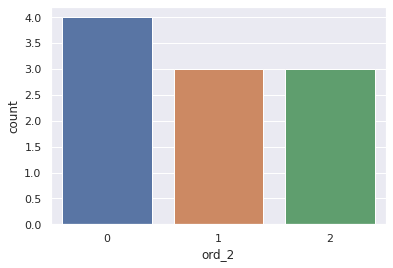

In [4]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['ord_2'] = le.fit_transform(df['ord_2'])
sns.set(style ="darkgrid")
sns.countplot(df['ord_2'])

**Ordinal Encoding**

In [5]:
import category_encoders as ce
import pandas as pd
train_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                          mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}])
#Original data
train_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [6]:
#fit and transform train data 
df_train_transformed = encoder.fit_transform(train_df)
pd.concat([train_df,df_train_transformed], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Degree,Degree
0,High school,1
1,Masters,4
2,Diploma,2
3,Bachelors,3
4,Bachelors,3
5,Masters,4
6,Phd,5
7,High school,1
8,High school,1


**Example 2**

In [7]:
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
# fitting encoder
ord1.fit([df['ord_2']])
# tranforming the column after fitting
df["ord_2"]= ord1.fit_transform(df[["ord_2"]]) 
df.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,1.0
1,1,F,Y,Blue,2.0
2,2,F,N,Blue,0.0
3,3,F,N,Green,2.0
4,4,T,N,Red,0.0
5,5,T,N,Green,1.0
6,6,F,N,Red,0.0
7,7,T,N,Red,0.0
8,8,F,N,Blue,2.0
9,9,F,Y,Red,1.0


**Manually assigning ranking by using dictionary**

In [8]:
# creating a dictionary
temp_dict ={'Cold':1, 'Warm':2, 'Hot':3} 
# mapping values in column from dictionary
df['Ord_2_encod']= df.ord_2.map(temp_dict)
df = df.drop(['ord_2'], axis = 1)
df.head(6)

,id,bin_1,bin_2,nom_0,Ord_2_encod
0,0,F,N,Red,NaN
1,1,F,Y,Blue,NaN
2,2,F,N,Blue,NaN
3,3,F,N,Green,NaN
4,4,T,N,Red,NaN
5,5,T,N,Green,NaN


#One-Hot encoding 
We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

To overcome the Disadvantage of Label Encoding as it considers some hierarchy in the columns which can be misleading to nominal features present in the data. we can use One-Hot Encoding strategy.


**One-hot encoding is processed in 2 steps:**

* Spliting of categories to different columns.
* Put ‘0 for others and ‘1’ as an indicator for the appropriate column.

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = enc.fit_transform(df[['nom_0']]).toarray()
encoded_colm = pd.DataFrame(enc)
df = pd.concat([df, encoded_colm], axis = 1) 
df.head(10)

,id,bin_1,bin_2,nom_0,Ord_2_encod,0,1,2
0,0,F,N,Red,NaN,0.0,0.0,1.0
1,1,F,Y,Blue,NaN,1.0,0.0,0.0
2,2,F,N,Blue,NaN,1.0,0.0,0.0
3,3,F,N,Green,NaN,0.0,1.0,0.0
4,4,T,N,Red,NaN,0.0,0.0,1.0
5,5,T,N,Green,NaN,0.0,1.0,0.0
6,6,F,N,Red,NaN,0.0,0.0,1.0
7,7,T,N,Red,NaN,0.0,0.0,1.0
8,8,F,N,Blue,NaN,1.0,0.0,0.0
9,9,F,Y,Red,NaN,0.0,0.0,1.0


The above method is more preferable since it gives good labels.
* **Note**: One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques.


#Dummy Encoding
Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

In [10]:
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']})
data_encoded=pd.get_dummies(data=data,drop_first=True)
pd.concat([data,data_encoded],axis=1)

,City,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,Delhi,0,1,0,0
1,Mumbai,0,0,0,1
2,Hyderabad,0,0,1,0
3,Chennai,1,0,0,0
4,Bangalore,0,0,0,0
5,Delhi,0,1,0,0
6,Hyderabad,0,0,1,0


**Drawbacks of  One-Hot and Dummy Encoding**:
One hot encoder and dummy encoder are two powerful and effective encoding schemes. They are also very popular among the data scientists, But may not be as effective when-

1. A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
2. If we have multiple categorical features in the dataset similar situation will occur and again we will end to have several binary features each representing the categorical feature and their multiple categories e.g a dataset having 10 or more categorical columns.


In both the above cases, these two encoding schemes introduce sparsity in the dataset i.e several columns having 0s and a few of them having 1s. In other words, it creates multiple dummy features in the dataset without adding much information.

Also, they might lead to a Dummy variable trap. It is a phenomenon where features are highly correlated. That means using the other variables, we can easily predict the value of a variable.

Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive. Further, while using tree-based models these encodings are not an optimum choice.

#Effect Encoding:
This encoding technique is also known as **Deviation Encoding** or **Sum Encoding**. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.

The row containing only 0s in dummy encoding is encoded as -1 in effect encoding.  In the dummy encoding example, the city Bangalore at index 4  was encoded as 0000. Whereas in effect encoding it is represented by -1-1-1-1.

In [11]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']}) 
encoder=ce.sum_coding.SumEncoder(cols='City',verbose=False,)
data_transformed = encoder.fit_transform(data)
pd.concat([data,data_transformed],axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,City,intercept,City_0,City_1,City_2,City_3
0,Delhi,1,1.0,0.0,0.0,0.0
1,Mumbai,1,0.0,1.0,0.0,0.0
2,Hyderabad,1,0.0,0.0,1.0,0.0
3,Chennai,1,0.0,0.0,0.0,1.0
4,Bangalore,1,-1.0,-1.0,-1.0,-1.0
5,Delhi,1,1.0,0.0,0.0,0.0
6,Hyderabad,1,0.0,0.0,1.0,0.0


Effect encoding is an advanced technique. In case you are interested to know more about effect encoding, refer to [this](https://www.researchgate.net/publication/256349393_Categorical_Variables_in_Regression_Analysis_A_Comparison_of_Dummy_and_Effect_Coding) interesting paper.

#Hash Encoding


To understand Hash encoding it is necessary to know about hashing. Hashing is the transformation of arbitrary size input in the form of a fixed-size value. We use hashing algorithms to perform hashing operations i.e to generate the hash value of an input. Further, hashing is a one-way process, in other words, one can not generate original input from the hash representation.

Hashing has several applications like data retrieval, checking data corruption, and in data encryption also. We have multiple hash functions available for example Message Digest (MD, MD2, MD5), Secure Hash Function (SHA0, SHA1, SHA2), and many more.

Just like one-hot encoding, the Hash encoder represents categorical features using the new dimensions. Here, the user can fix the number of dimensions after transformation using n_component argument. Here is what I mean – A feature with 5 categories can be represented using N new features similarly, a feature with 100 categories can also be transformed using N new features. 

By default, the Hashing encoder uses the md5 hashing algorithm but a user can pass any algorithm of his choice. If you want to explore the md5 algorithm, I suggest [this](https://ieeexplore.ieee.org/document/5474379) paper.

**Example 1**

In [12]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})
encoder=ce.HashingEncoder(cols='Month',n_components=6)
data_transformed = encoder.fit_transform(data)
pd.concat([data, data_transformed],axis=1)

,Month,col_0,col_1,col_2,col_3,col_4,col_5
0,January,0,0,0,0,1,0
1,April,0,0,0,1,0,0
2,March,0,0,0,0,1,0
3,April,0,0,0,1,0,0
4,Februay,0,0,0,1,0,0
5,June,0,1,0,0,0,0
6,July,1,0,0,0,0,0
7,June,0,1,0,0,0,0
8,September,0,0,0,0,1,0


**Example 2** 
Hashing is the process of converting of a string of characters into a unique hash value with applying a hash function. This process is quite useful as it can deal with a higher number of categorical data and its low memory usage.

[Article Rearding hashing](https://dzone.com/articles/feature-hashing-for-scalable-machine-learning)

In [13]:
from sklearn.feature_extraction import FeatureHasher
# n_features contains the number of bits you want in your hash value.
h = FeatureHasher(n_features = 3, input_type ='string')
# tranforming the column after fitting
hashed_Feature = h.fit_transform(df['nom_0'])
hashed_Feature = hashed_Feature.toarray()
df = pd.concat([df, pd.DataFrame(hashed_Feature)], axis = 1)
df.head(10)

,id,bin_1,bin_2,nom_0,Ord_2_encod,0,1,2,0,1,2
0,0,F,N,Red,NaN,0.0,0.0,1.0,1.0,2.0,0.0
1,1,F,Y,Blue,NaN,1.0,0.0,0.0,0.0,2.0,0.0
2,2,F,N,Blue,NaN,1.0,0.0,0.0,0.0,2.0,0.0
3,3,F,N,Green,NaN,0.0,1.0,0.0,0.0,3.0,0.0
4,4,T,N,Red,NaN,0.0,0.0,1.0,1.0,2.0,0.0
5,5,T,N,Green,NaN,0.0,1.0,0.0,0.0,3.0,0.0
6,6,F,N,Red,NaN,0.0,0.0,1.0,1.0,2.0,0.0
7,7,T,N,Red,NaN,0.0,0.0,1.0,1.0,2.0,0.0
8,8,F,N,Blue,NaN,1.0,0.0,0.0,0.0,2.0,0.0
9,9,F,Y,Red,NaN,0.0,0.0,1.0,1.0,2.0,0.0


,id,bin_1,bin_2,ord_2
0,0,F,N,Hot
1,1,F,Y,Warm
2,2,F,N,Cold
3,3,F,N,Warm
4,4,T,N,Cold
5,5,T,N,Hot
6,6,F,N,Cold
7,7,T,N,Cold
8,8,F,N,Warm
9,9,F,Y,Hot


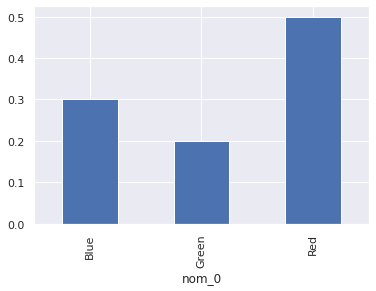

In [14]:
# grouping by frequency
fq = df1.groupby('nom_0').size()/len(df)   
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('nom_0')] = df1['nom_0'].map(fq)  
# drop original column.
df = df1.drop(['nom_0'], axis = 1) 
fq.plot.bar(stacked = True)  
df.head(10)

Since Hashing transforms the data in lesser dimensions, it may lead to loss of information. Another issue faced by hashing encoder is the collision. Since here, a large number of features are depicted into lesser dimensions, hence multiple values can be represented by the same hash value, this is known as a collision.

Moreover, hashing encoders have been very successful in some Kaggle competitions. It is great to try if the dataset has high cardinality features.

#Binary Encoding:
Initially categories are encoded as Integer and then converted into binary code, then the digits from that binary string are placed into separate columns.
for eg: for 7 : 1 1 1
This method is quite preferable when there are more number of categories. Imagine if you have 100 different categories. One hot encoding will create 100 different columns, But binary encoding only need 7 columns.

In [15]:
from category_encoders import BinaryEncoder 
encoder = BinaryEncoder(cols =['ord_2']) 
newdata = encoder.fit_transform(df1['ord_2'])
df = pd.concat([df1, newdata], axis = 1) 
df.head(10)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,bin_1,bin_2,nom_0,ord_2,ord_2_0,ord_2_1,ord_2_2
0,0,F,N,Red,Hot,0,0,1
1,1,F,Y,Blue,Warm,0,1,0
2,2,F,N,Blue,Cold,0,1,1
3,3,F,N,Green,Warm,0,1,0
4,4,T,N,Red,Cold,0,1,1
5,5,T,N,Green,Hot,0,0,1
6,6,F,N,Red,Cold,0,1,1
7,7,T,N,Red,Cold,0,1,1
8,8,F,N,Blue,Warm,0,1,0
9,9,F,Y,Red,Hot,0,0,1


#Base N Encoding


Before diving into BaseN encoding let’s first try to understand what is Base here?

In the numeral system, the Base or the radix is the number of digits or a combination of digits and letters used to represent the numbers. The most common base we use in our life is 10  or decimal system as here we use 10 unique digits i.e 0 to 9 to represent all the numbers. Another widely used system is binary i.e. the base is 2. It uses 0 and 1 i.e 2 digits to express all the numbers.

For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form. If you want to change the Base of encoding scheme you may use Base N encoder. In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.


In [16]:
import category_encoders as ce
import pandas as pd
#Create the dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})
encoder= ce.BaseNEncoder(cols=['City'],return_df=True,base=5)

#Fit and Transform Data
data_encoded=encoder.fit_transform(data)
pd.concat([data, data_encoded], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,City,City_0,City_1,City_2
0,Delhi,0,0,1
1,Mumbai,0,0,2
2,Hyderabad,0,0,3
3,Chennai,0,0,4
4,Bangalore,0,1,0
5,Delhi,0,0,1
6,Hyderabad,0,0,3
7,Mumbai,0,0,2
8,Agra,0,1,1


In the above example, I have used base 5 also known as the Quinary system. It is similar to the example of Binary encoding. While Binary encoding represents the same data by 4 new features the BaseN encoding uses only 3 new variables.

Hence BaseN encoding technique further reduces the number of features required to efficiently represent the data and improving memory usage. The default Base for Base N is 2 which is equivalent to Binary Encoding.

#Frequency Encoding: 

- Step 1 : Select a categorical variable you would like to transform.
- Step 2 : Group by the categorical variable and obtain counts of each category.
- Step 3 : Join it back with the train dataset.

In [17]:
sample_df = df1['nom_0']
sample_df

0      Red
1     Blue
2     Blue
3    Green
4      Red
5    Green
6      Red
7      Red
8     Blue
9      Red
Name: nom_0, dtype: object

In [18]:
sample_df = df1[['nom_0']].groupby('nom_0').size().reset_index()
sample_df.head()

,nom_0,0
0,Blue,3
1,Green,2
2,Red,5


#Mean/Target Encoding: 
In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.


Target encoding is good because it picks up values that can explain the target. It is used by most kagglers in their competitions. The basic idea to replace a categorical value with the mean of the target variable.

Video walkthrough of the following code : https://www.youtube.com/watch?v=OTPz5plKb40

In [20]:
# inserting Target column in the dataset since it needs a target
df1.insert(5, "Target", [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], True)
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# tranforming the column after fitting
values = Targetenc.fit_transform(X = df1.nom_0, y = df1.Target)
# concating values with dataframe
df = pd.concat([df1, values], axis = 1)
df.head(10)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,bin_1,bin_2,nom_0,ord_2,Target,nom_0
0,0,F,N,Red,Hot,0,0.203597
1,1,F,Y,Blue,Warm,1,0.634879
2,2,F,N,Blue,Cold,1,0.634879
3,3,F,N,Green,Warm,0,0.473106
4,4,T,N,Red,Cold,0,0.203597
5,5,T,N,Green,Hot,1,0.473106
6,6,F,N,Red,Cold,0,0.203597
7,7,T,N,Red,Cold,0,0.203597
8,8,F,N,Blue,Warm,0,0.634879
9,9,F,Y,Red,Hot,1,0.203597
